# MLP Project: 

## Name: Ashwin Hebbar
## Roll no.: 21f1****5
---
- Term: **T3 - 2023**
- Problem Type: **Regression**
- Problem Title: **Taxi Fare Guru Total Amount Prediction**
- Rank: 63/714
- R^2 Score: 0.94647

In [1]:
# DEFAULT KAGGLE CELL


# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv


# Loading the Data 

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

train_data_path = "./train.csv"
test_data_path = "./test.csv"
train_data_raw = pd.read_csv(train_data_path)

# Only training data loaded, We will be loading test data when reqd.
# sample.csv is a submission sample. We don't need it.

In [3]:
train_data_raw.head() #Data overview

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0


In [4]:
train_data_raw.info() #To figure out the nature of the data, i.e categorical or numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  total_amount           175000 non-nu

# Exploratory Data Analysis

## Identifying Feature Types

### Categorical

1. payment_type (Type: text)
2. store_and_fwd_flag (Type: text)
3. PULocationID
4. DOLocationID
5. passenger_count
6. RateCodeID

All the categorical variables except payment_type and store_and_fwd_flag is numerical in nature.

### Continuous

1. trip_distance
2. extra
3. tip_amount
4. tolls_amount
5. improvement_surcharge
6. congestion_surcharge
7. Airport_fee

This leaves tpep_pickup_datetime, tpep_dropoff_datetime and total_amount. We are going to ignore total amount as it is the target variable here.

- tpep_pickup_datetime and tpep_dropoff_datetime are of datetime datatype. (not sure if this is the right word to refer to it), so we will need further preprocessing to make see and check if it's useful in anyway.


In [5]:
train_data_raw.isnull().sum() # count of null values in each column

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          6077
trip_distance               0
RatecodeID               6077
store_and_fwd_flag       6077
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6077
Airport_fee              6077
dtype: int64

# Columns with missing values:

- passenger count
- RatecodeID
- store_and_fwd_flag
- congestion_surcharge
- Airport_fee


In [6]:
train_data_raw.describe() # statistical summary of the training data

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,175000.000000,168923.000000,175000.000000,168923.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,168923.000000,168923.000000
mean,0.728377,1.357678,5.145930,1.518307,132.710349,132.701429,1.932143,6.127497,0.646816,0.979689,29.633901,2.246971,0.158825
std,0.445606,0.891283,394.971052,6.514678,76.148799,76.192493,1.948497,4.610834,2.328274,0.198775,25.425206,0.819216,0.511968
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-7.500000,0.000079,-29.300000,-1.000000,-576.750000,-2.500000,-1.750000
25%,0.000000,1.000000,1.080000,1.000000,67.000000,67.000000,0.000000,3.473321,0.000000,1.000000,16.300000,2.500000,0.000000
50%,1.000000,1.000000,1.840000,1.000000,133.000000,133.000000,1.000000,5.286217,0.000000,1.000000,21.450000,2.500000,0.000000
75%,1.000000,1.000000,3.610000,1.000000,199.000000,199.000000,2.500000,7.502746,0.000000,1.000000,31.800000,2.500000,0.000000
max,2.000000,9.000000,135182.060000,99.000000,264.000000,264.000000,11.750000,484.876151,80.000000,1.000000,587.250000,2.500000,1.750000


In [7]:
def show_unique_values(df):
    for column in df:
        print(f"--------{column}--------")
        print(column, df[column].value_counts())
        print("\n")

show_unique_values(train_data_raw) # show unique values in each column

--------VendorID--------
VendorID VendorID
1    127340
0     47597
2        63
Name: count, dtype: int64


--------tpep_pickup_datetime--------
tpep_pickup_datetime tpep_pickup_datetime
2023-06-28 18:11:16    8
2023-06-28 19:27:11    8
2023-06-28 18:42:04    8
2023-06-29 16:29:15    8
2023-06-30 10:10:19    8
                      ..
2023-06-29 22:20:13    1
2023-06-30 09:33:42    1
2023-06-28 19:26:26    1
2023-06-29 05:51:13    1
2023-06-30 21:26:43    1
Name: count, Length: 109877, dtype: int64


--------tpep_dropoff_datetime--------
tpep_dropoff_datetime tpep_dropoff_datetime
2023-06-29 19:08:22    10
2023-06-28 18:36:02     8
2023-06-29 18:45:50     8
2023-06-29 18:04:14     8
2023-06-29 12:28:20     8
                       ..
2023-06-29 14:52:05     1
2023-06-30 13:57:09     1
2023-06-28 17:13:46     1
2023-06-29 12:28:23     1
2023-06-30 22:54:42     1
Name: count, Length: 109713, dtype: int64


--------passenger_count--------
passenger_count passenger_count
1.0    128534
2.0  

## Observed anomalies in the dataset.

- There is an 'unknown' payment type. This may be considered as a missing value.
- Almost all the numerical and continuous parameters have negative values except trip distance. Given these parameters talk about amount and surcharges, it would make no sense for them to be negative.
- trip_distance has a max value of 135812. This is clearly an outlier.
- ~2800 entries in passenger_count is marked as 0.

The following issues must be fixed in order to ensure not to introduce unneeded bias and inaccuracies in our models.


In [8]:
correlations = train_data_raw.corr(numeric_only=True) # correlation matrix
print(correlations['total_amount'])

VendorID                 0.039695
passenger_count          0.053224
trip_distance            0.009911
RatecodeID               0.055527
PULocationID             0.000715
DOLocationID            -0.002954
extra                    0.234346
tip_amount               0.638658
tolls_amount             0.684765
improvement_surcharge    0.224036
total_amount             1.000000
congestion_surcharge    -0.147765
Airport_fee              0.597829
Name: total_amount, dtype: float64


## Correlations: 

We see that the following columns have a correlation with the target variable ('total_amount'):
- extra
- tip_amount
- tolls_amount
- improvement_surcharge
- congestion_charge (slightly negative correlation)
- Airport_fee

## VIsualizing Key Statistics

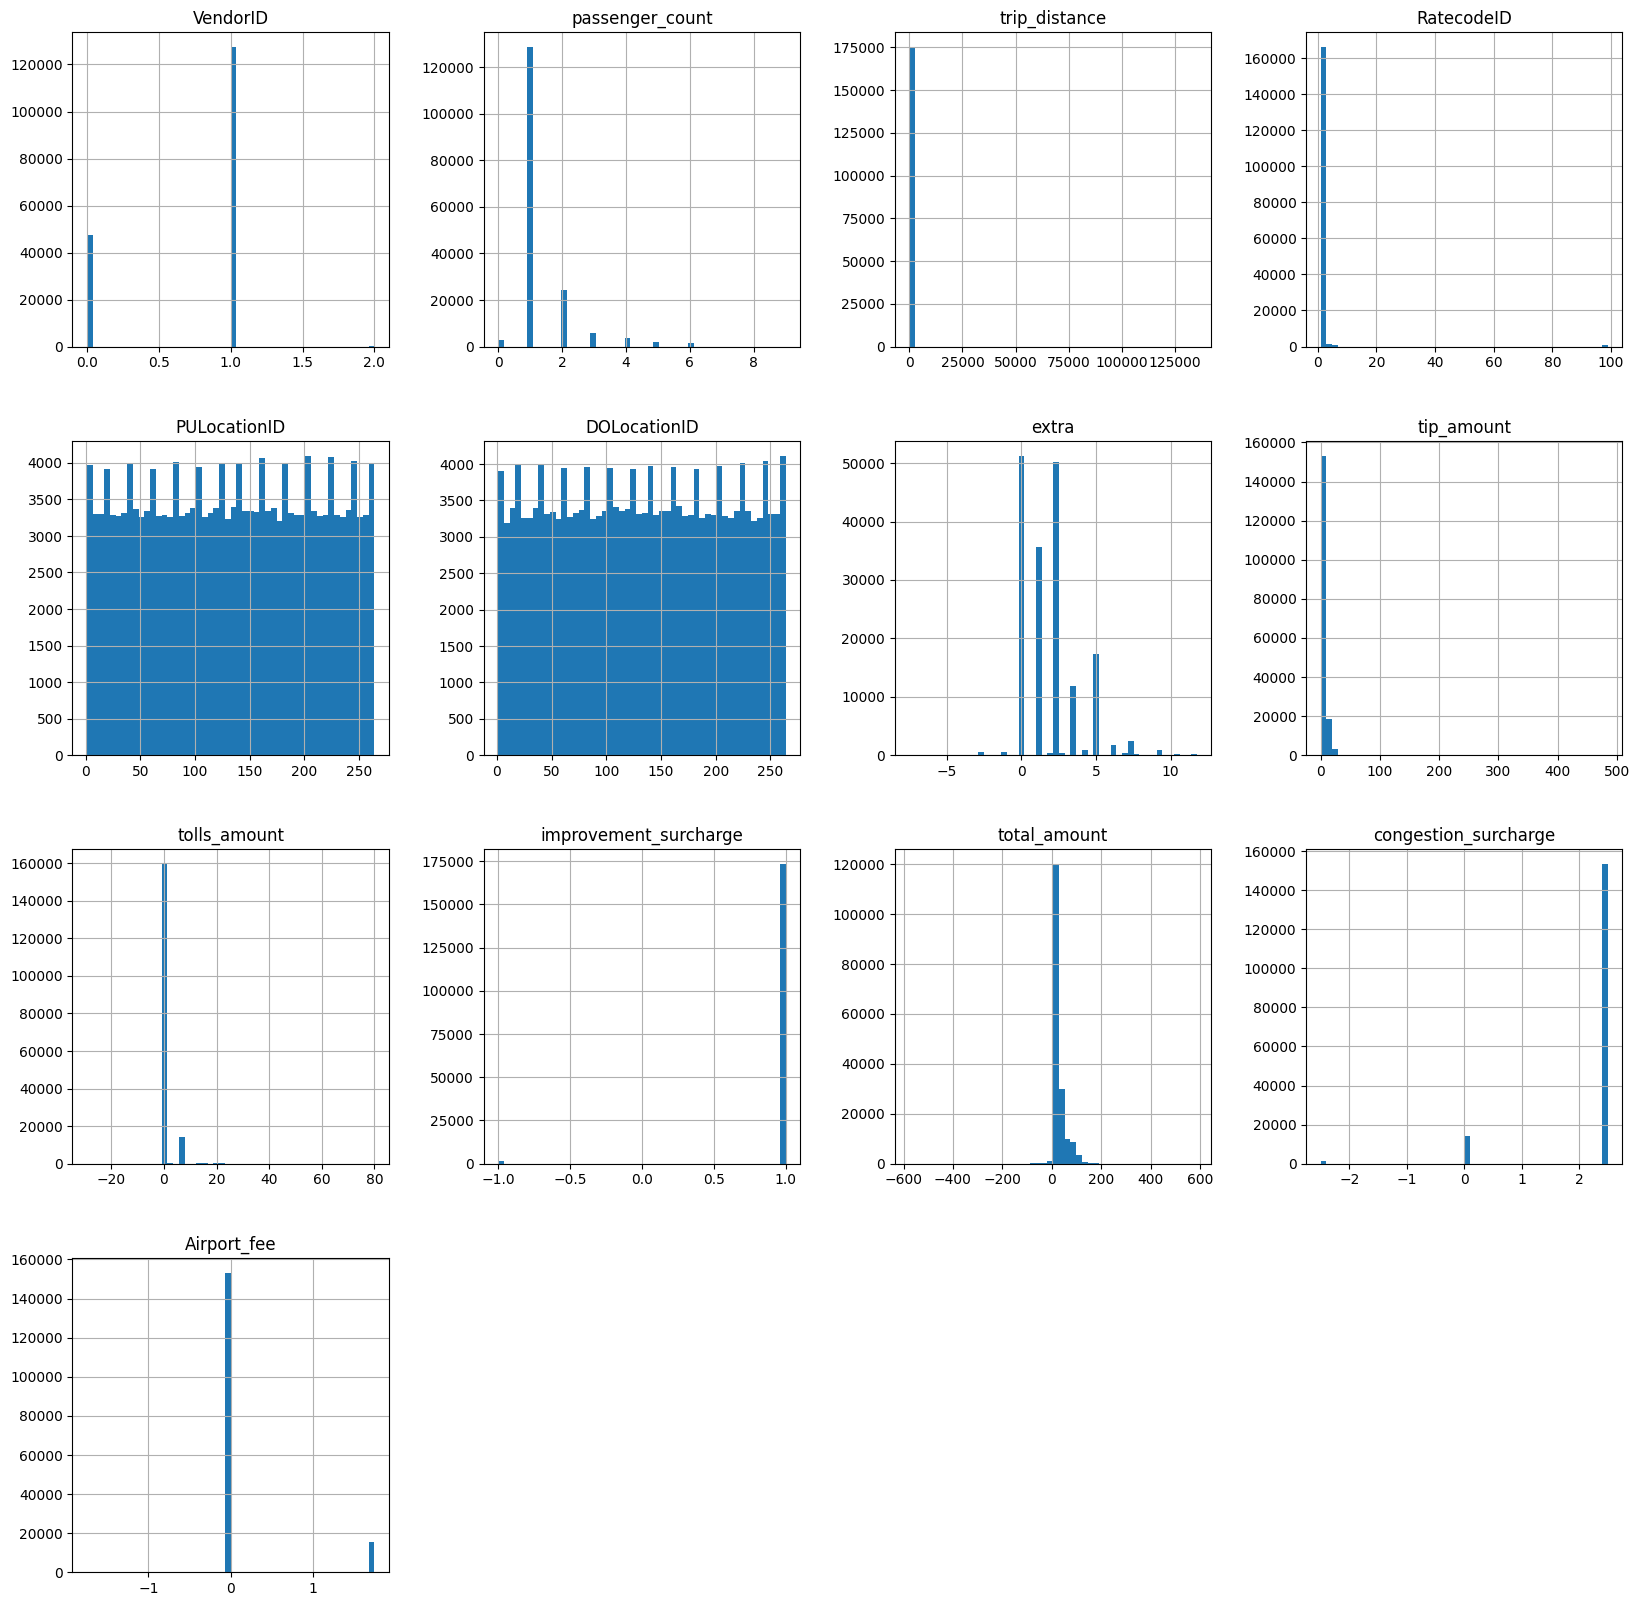

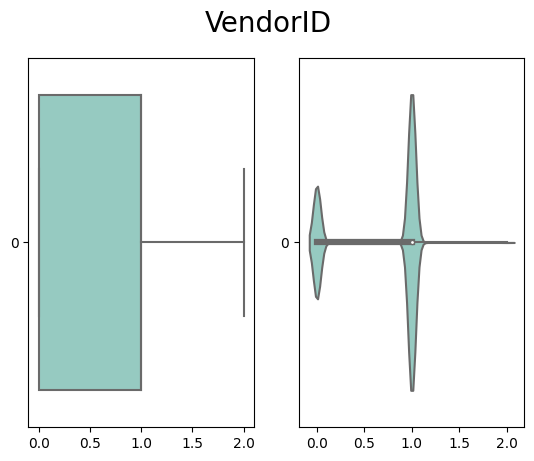

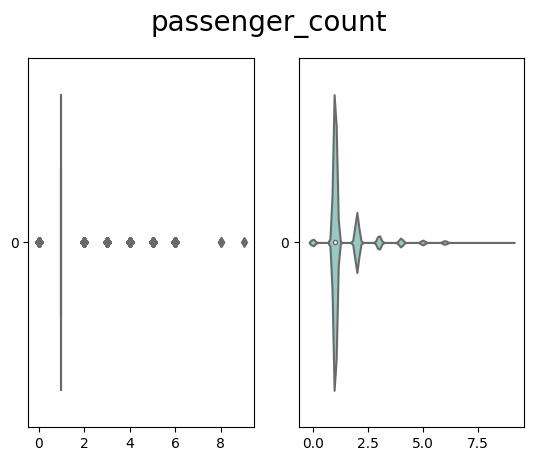

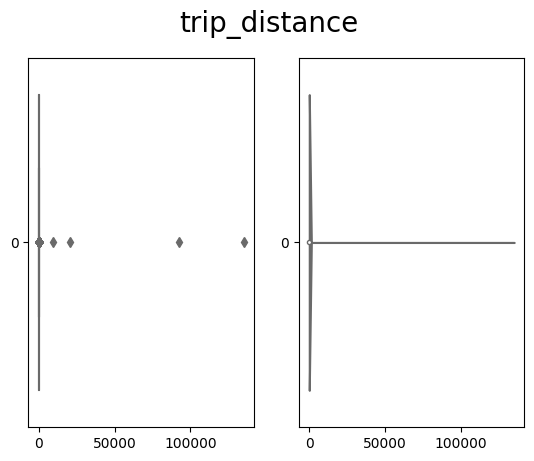

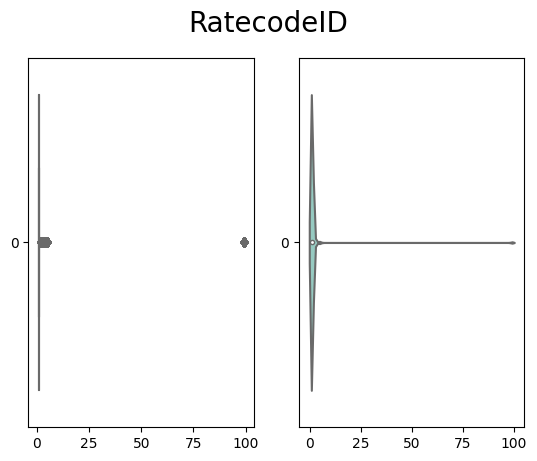

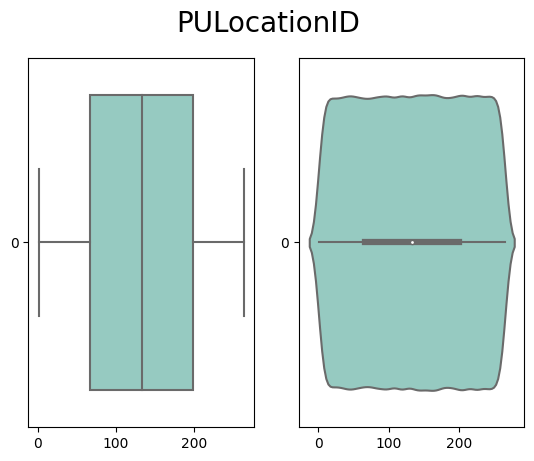

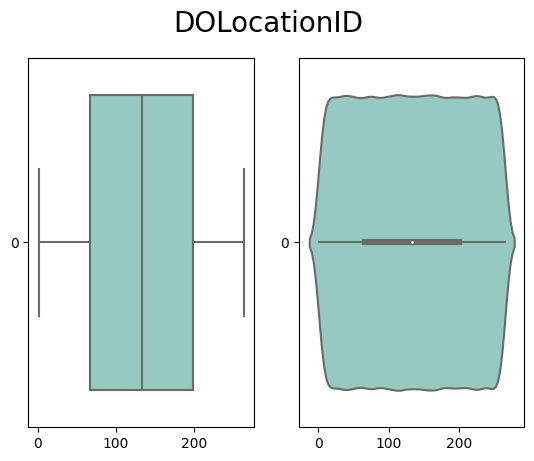

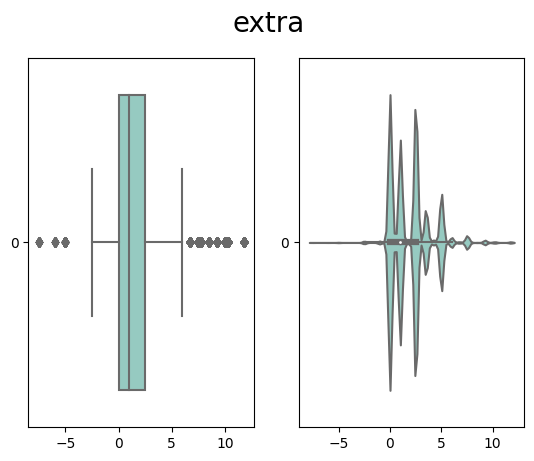

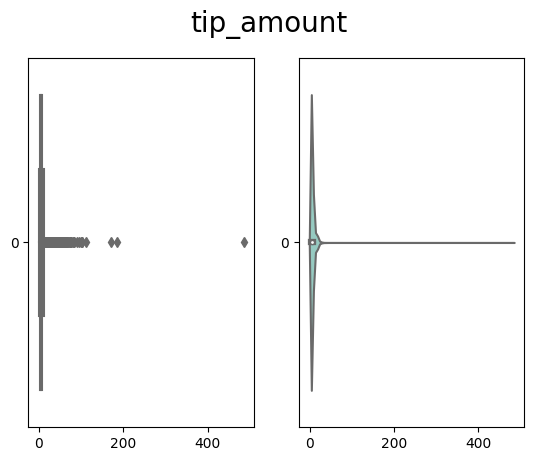

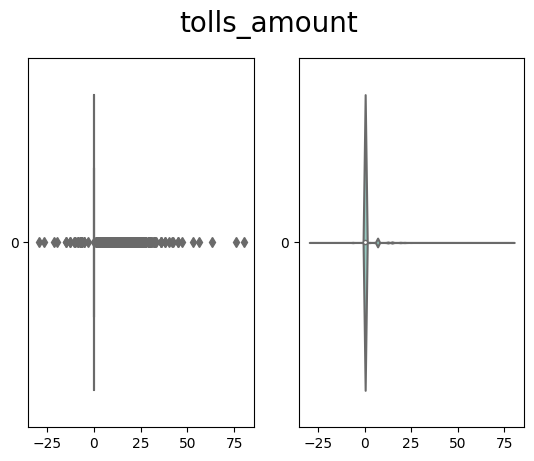

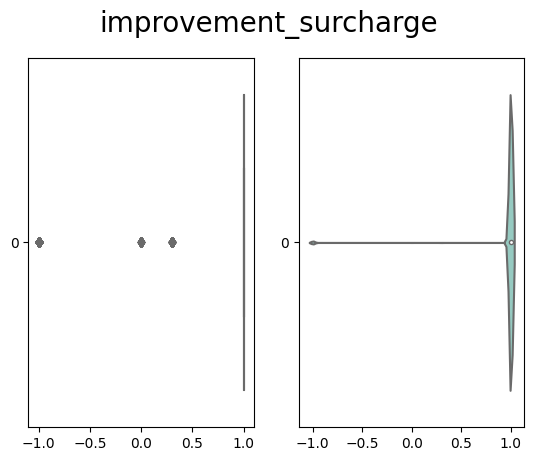

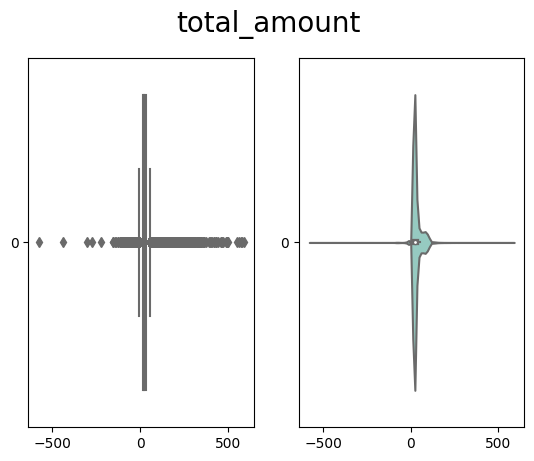

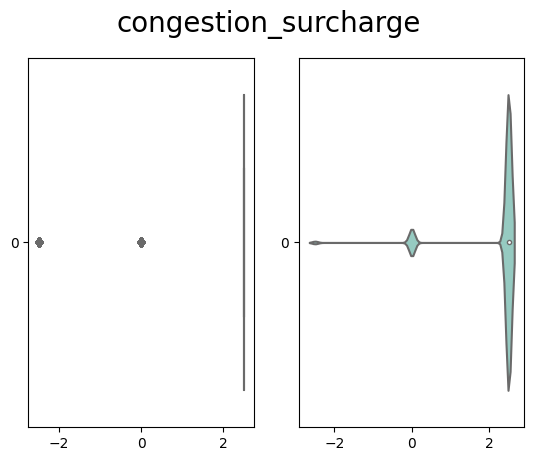

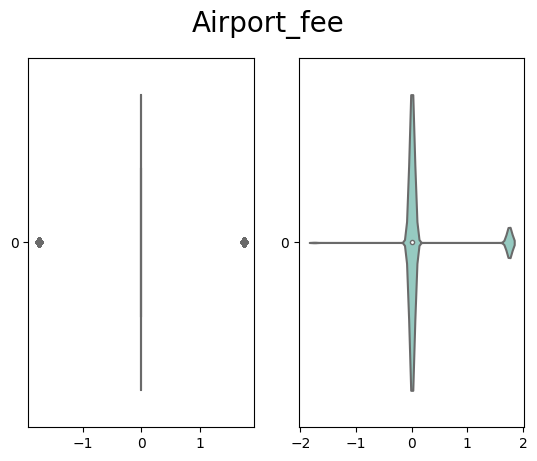

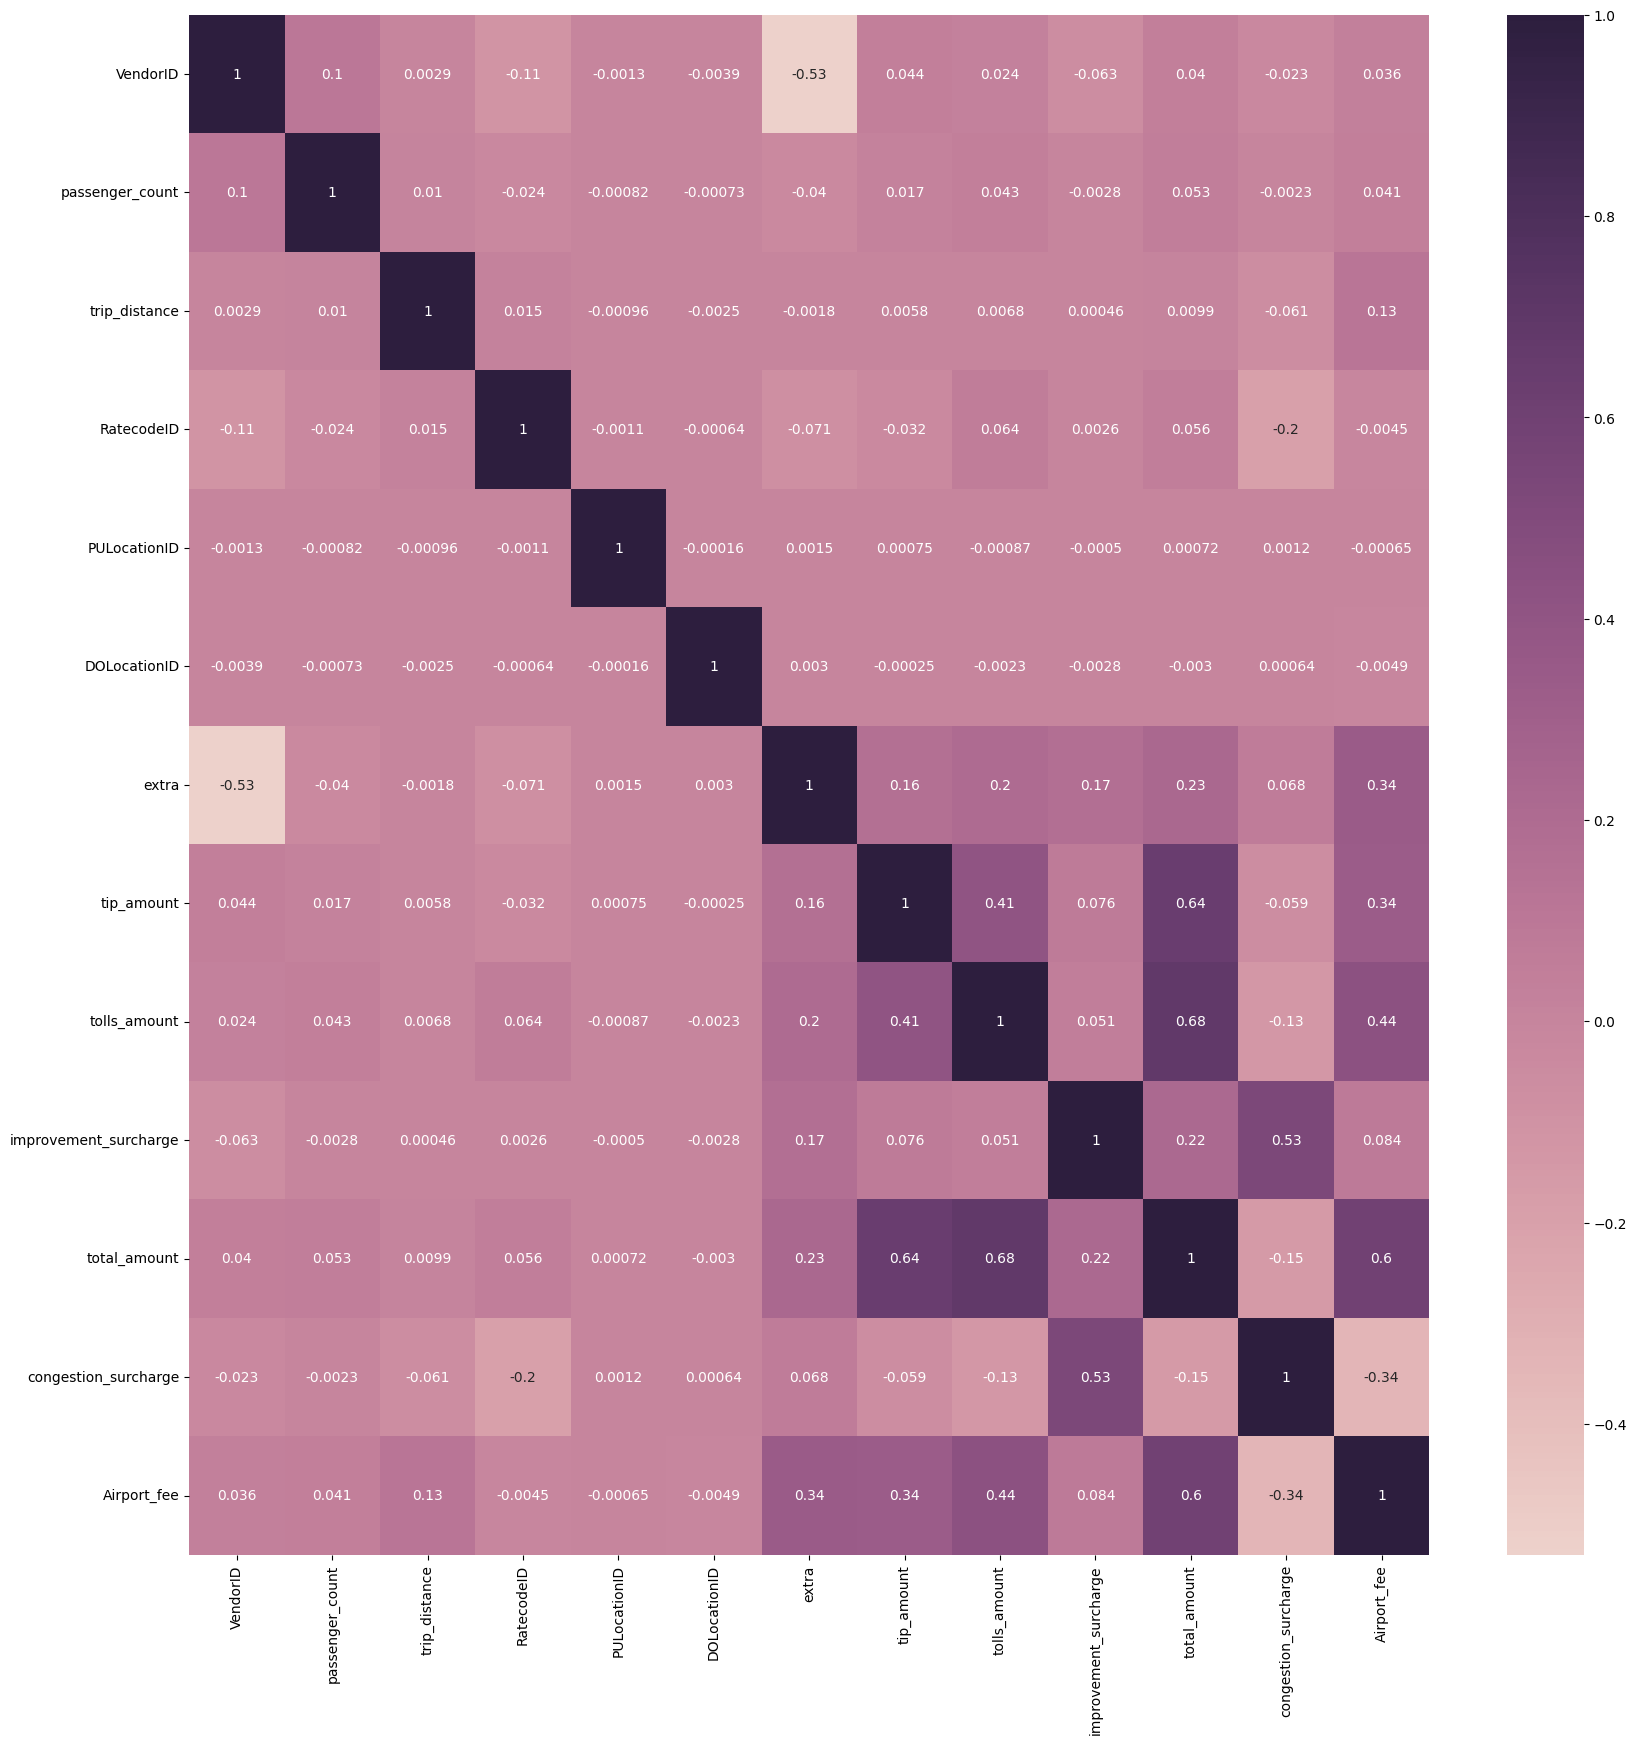

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
def figures(df):
    # histograms
#     plt.figure(figsize=(20, 20))
    df.hist(bins=50, figsize=(20,20))
    plt.show()
    
    # box/whisker plots and violin plots for each numeric variable
    for column in df.columns:
        if df[column].dtype != 'object':
            _, axis = plt.subplots(1,2)
            sns.boxplot(data = df[column], orient = "h", palette = "Set3", ax=axis[0])
            sns.violinplot(data = df[column], orient = "h", palette = "Set3", ax=axis[1])
            plt.suptitle(column, fontsize = 20) # seems to be buggy, sometimes doesn't show on local
            plt.show()

    #correlation heatmaps
    correlations = train_data_raw.corr(numeric_only=True)
    plt.figure(figsize=(20, 20))
    sns.heatmap(correlations, cmap=sns.cubehelix_palette(as_cmap=True), annot=True)
    plt.show()

    #pairplots #! Good plotting but takes way too much time to plot even locally
    # parameters = list(correlations['total_amount'].index)
    # parameters.remove('congestion_surcharge')
    # pairplot_compatiable = parameters.copy()[6:]
    # plt.figure(figsize=(20, 20))
    # sns.pairplot(df[pairplot_compatiable])
    # plt.show()

figures(train_data_raw)
    
    
    

In [10]:
from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

# Feature Engineering

In [11]:
def featureEngineering(df, flags = {
        "absolute": False, # R^2 score tends to be higher when absolute is set to False
        "scaling": False, # R^2 score tends to be higher when Scaling is set to False
        "drop": False # R^2 score tends to be higher when we set drop to False
    }):
    

    
    absolute_columns = ['extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'Airport_fee']
    scale_outliers = ['total_amount']
    
    # convert datetime to pandas object, can be used to convert to time
    # print(df)
    
    df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
    df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
    
    
    # calculate trip duration, we are taking absolute value here because we cannot go back in time (yet)
    df['trip_duration'] = abs((df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds())
    df['trip_duration'] = df['trip_duration'].astype(int)
    
    # drop columns, we don't need these columns anymore
    df = df.drop(columns = ['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis = 1)
    
    if flags['absolute']:
        for column in absolute_columns:
            df[column] = abs(df[column])
    
    if flags['scaling']:
        for column in scale_outliers:
            df[column] = np.log(df[column])
    
    if flags['drop']:
        df.dropna(thresh = 10, inplace = True)
    
    # replace "unknown" with np.nan
    df["payment_type"] = df["payment_type"].replace("unknown", np.nan)
    
    # replace 0 pasenger count with np.nan
    df["passenger_count"] = df["passenger_count"].replace(0, np.nan)
    
    return df

# Imputation and Preprocessing (Scaling and Encoding)

### Pipelines and Column Transformations

In [12]:
def preprocessing(df, as_sep = False, as_df=False, scaled=True):
    absolute_target = False
    
    df = df.copy(deep=True)
    
    features = df.columns
    target_column = 'total_amount'
    
    if target_column in features:
        has_y_col = True
    else:
        has_y_col = False
        
    if has_y_col:
        if absolute_target:
            df[target_column] = abs(df[target_column])
        labels = df.pop(target_column)
    
    df = featureEngineering(df)
    
    text_cols = ['store_and_fwd_flag', 'payment_type']
    ordinal_cols = []
    categorical_cols = []
    ignored = []
    num_cols = text_cols + ordinal_cols + categorical_cols + ignored
    num_cols = [_ for _ in df.columns if _ not in num_cols]
    
    # Imputer Classes
    simpleImputer = SimpleImputer()
    frequencyImputer = SimpleImputer(strategy = 'most_frequent')
    
    #Encoder Classes
    ohEncoder = OneHotEncoder()
    ordEncoder = OrdinalEncoder()
    
    #Scaler Classes
    minmaxScaler = MinMaxScaler()
    
    
    # Pipelines
    from sklearn.pipeline import Pipeline
    # from sklearn.compose import ColumnTransformer
    
    text_categorical_pipeline = Pipeline([('imputer', frequencyImputer),
                                          ('encoder', ohEncoder)
                                          ])
    
    numerical_categorical_pipeline = Pipeline([('imputer', frequencyImputer),
                                               ('enconder', ohEncoder)
                                               ])
    
    ordinal_pipeline = Pipeline([('imputer', simpleImputer),
                                 ('encoder', ordEncoder)
                                 ])
    
    numerical_pipeline = Pipeline([('imputer', simpleImputer),
                                   ('scaler', minmaxScaler)
                                   ])
        
    # Column Transformer
    from sklearn.compose import ColumnTransformer
    
    transformers = [
        ('numerical_categorical', numerical_categorical_pipeline, categorical_cols),
        ('ordinal', ordinal_pipeline, ordinal_cols),
        ('numerical', numerical_pipeline, num_cols),
        ('text_categorical', text_categorical_pipeline, text_cols),
        ('ignored', frequencyImputer, ignored)
    ]
    
    col_transform = ColumnTransformer(transformers, remainder = 'passthrough', sparse_threshold=0)
    
    training_data = featureEngineering(train_data_raw.drop([target_column], axis = 1))
    col_transform.fit(training_data)
    transformed_data = col_transform.transform(df)
    
    if(as_df):
        new_col_names = col_transform.get_feature_names_out()
        new_df = pd.DataFrame(transformed_data, columns = new_col_names)
        return new_df
    
    if(has_y_col and as_sep):
        return (transformed_data, labels)
    
    if(as_sep and has_y_col and as_df):
        new_col_names = col_transform.get_feature_names_out()
        new_df = pd.DataFrame(transformed_data, columns = new_col_names)
        
        return (new_df, labels)

    
    return transformed_data

def preprocess_and_split_dataset(d, scaled = True):
    
    X, y = preprocessing(d, as_sep = True, scaled = scaled)
    
    
    
    return train_test_split(X, y, test_size=0.2)

In [13]:
# preview the preprocessed data
preprocess_and_split_dataset(train_data_raw)

[array([[5.00000000e-01, 0.00000000e+00, 2.86280591e-05, ...,
         1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [5.00000000e-01, 0.00000000e+00, 2.15265250e-05, ...,
         1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [5.00000000e-01, 0.00000000e+00, 1.10221726e-05, ...,
         1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [5.00000000e-01, 0.00000000e+00, 1.34633249e-05, ...,
         1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [5.00000000e-01, 3.75000000e-01, 4.09077950e-05, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [5.00000000e-01, 1.25000000e-01, 4.29051015e-06, ...,
         1.00000000e+00, 0.00000000e+00, 0.00000000e+00]]),
 array([[5.00000000e-01, 0.00000000e+00, 6.43576522e-06, ...,
         1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [5.00000000e-01, 0.00000000e+00, 7.05714945e-05, ...,
         1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [5.00000000e-01, 

# Evaluation Metrics: $R^2$ and $MAE$

In [14]:
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [15]:
# To store model metrics
model_scores = dict()
models = dict()

In [17]:
def gridsearch_helper(est=None, grid=dict(), cv=4):
    return GridSearchCV(est, param_grid=grid, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)

def add_model_to_list(name, score, model):
    model_scores[name] = score
    models[name] = model

def compute_scores(y_true, y_hat):
    result  = dict()
    
    result['r2'] = r2_score(y_true, y_hat)
    result['mae'] = mean_absolute_error(y_true, y_hat)
    
    return result

def evaluate_estimator(estimator, name, param_grid=dict(), scaled=True):
    
    X_train, X_test, y_train, y_test = preprocess_and_split_dataset(train_data_raw, scaled=scaled)

    # training of the model
    model = gridsearch_helper(est=estimator, grid=param_grid)
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    
    score = dict()
    score['training'] = compute_scores(y_train, model.predict(X_train))
    score['validation'] = compute_scores(y_test, y_hat)

    add_model_to_list(name, score, model)

# Estimators and Training

Note: Hyperparamater Tuning is not done by default on most estimators as it takes quite a lot of time to do. the GridSearchCV parameters can be passed in the params dictionary in each cell. 

In [18]:
# Linear Regression:

from sklearn.linear_model import LinearRegression

params_grid = {
    'fit_intercept': [True, False]
}


params_grid = {
#     "n_estimators": [50,100,200],
#     "max_features":[1,2,4,8],
#     "max_samples": [0.5,0.1],
#     "bootstrap": [True, False],
#     "bootstrap_features": [True, False]
}

estimator = LinearRegression(n_jobs=-1)

evaluate_estimator(
    estimator, 
    'linear_reg', 
    params_grid,
)



In [19]:
# SGD regressor 

from sklearn.linear_model import SGDRegressor

est = SGDRegressor(max_iter=1000)

params_grid = {
    # 'loss': ['squared_error', 'huber'],
    # 'alpha': [0.0001, 0.001, 0.01, 0.1],
    # 'learning_rate': ['optimal', 'adaptive', 'constant'],
    # 'eta0': [0.01, 0.1],
}

evaluate_estimator(
    est,
    'sgd_regressor',
    param_grid=params_grid,
)


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [20]:
# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

est = DecisionTreeRegressor()

evaluate_estimator(
    est, 
    'decision_tree_reg', 
    {}, 
    scaled=False
)

In [21]:
from sklearn.ensemble import BaggingRegressor

estimator = BaggingRegressor(n_jobs = -1)

evaluate_estimator(
    estimator, 
    'bagging_reg', 
    {},
)

In [22]:
from sklearn.ensemble import ExtraTreesRegressor

est = ExtraTreesRegressor(n_jobs=-1)

params_grid = {
    #     'n_estimators': [10, 50, 100],
    #     'criterion': ['mse', 'mae'],
    #     'max_depth': [2, 8, 16, 32, 50],
    #     'min_samples_split': [2, 4, 6],
    #     'min_samples_leaf': [1, 2],
    #     'max_features': ['auto', 'sqrt', 'log2'],
    #     'bootstrap': [True, False],
    #     'warm_start': [True, False]   
    
}

evaluate_estimator(
    est,
    'extra_trees_regressor',
    params_grid,
    scaled = False
)

In [23]:
from xgboost import XGBRegressor

est = XGBRegressor(n_jobs = -1)

params_grid = {
    
}

evaluate_estimator(
    est, 
    'xgboost_reg', 
    params_grid, 
    scaled=False
)

In [24]:
from sklearn.ensemble import RandomForestRegressor

est = RandomForestRegressor(n_jobs= -1)

params_grid = {
}

evaluate_estimator(
    est, 
    'random_forest_reg', 
    params_grid, 
    scaled=False
)

# KERNEL CRASHES SOMETIMES, so not included in Model Results

# Model Results and Insights

In [25]:
# import pprint
from pprint import pprint

# sort models by validation r^2 score
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1]['validation']['r2'], reverse=True)

for model_name, score in sorted_scores:
    print(f"{model_name}:")
    for dataset, scores in score.items():
        print(f"\t{dataset}:")
        for metric, value in scores.items():
            print(f"\t\t{metric}: {value}")
    print("\n")

xgboost_reg:
	training:
		r2: 0.9755988666442207
		mae: 2.436125777844079
	validation:
		r2: 0.9511231925419673
		mae: 2.6973006916255953


extra_trees_regressor:
	training:
		r2: 1.0
		mae: 3.44528444464119e-14
	validation:
		r2: 0.9510627588329235
		mae: 2.781771034285715


bagging_reg:
	training:
		r2: 0.989284790187347
		mae: 1.164629707142858
	validation:
		r2: 0.9342409435365283
		mae: 2.893194971428572


random_forest_reg:
	training:
		r2: 0.992287509647503
		mae: 1.0222428600000002
	validation:
		r2: 0.9306767867783742
		mae: 2.843227454285715


decision_tree_reg:
	training:
		r2: 1.0
		mae: 1.5236447024692877e-15
	validation:
		r2: 0.8971607401915073
		mae: 3.8043242857142876


linear_reg:
	training:
		r2: 0.7275248633418239
		mae: 7.927940145089286
	validation:
		r2: 0.7158119328702742
		mae: 7.929222176339286


sgd_regressor:
	training:
		r2: 0.6761091290489831
		mae: 8.845820458762216
	validation:
		r2: 0.6814340123954389
		mae: 8.790786538690242




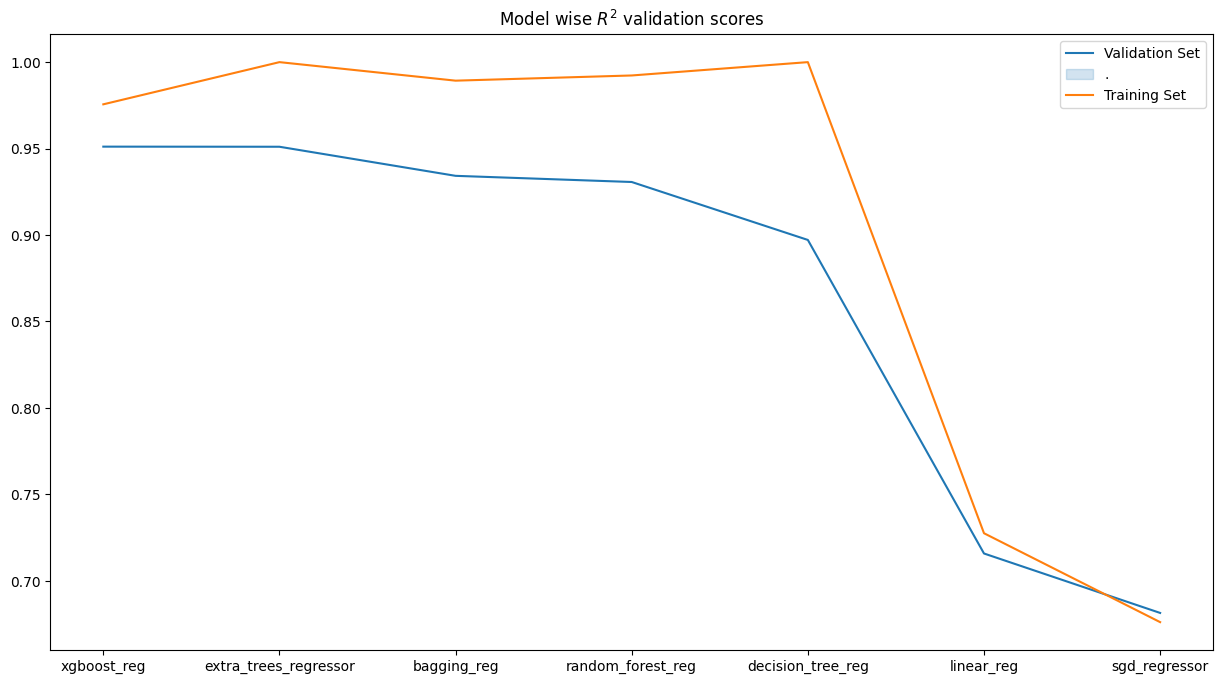

In [29]:
# Graphing the traning and validation r^2 scores for each model to compare them using sns from sorted_scores
import seaborn as sns
model_wise_r2_validation_scores = {model_name: score['validation']['r2'] for model_name, score in sorted_scores}
model_wise_r2_training_scores = {model_name: score['training']['r2'] for model_name, score in sorted_scores}

# plot model_wise_r2_validation_scores and model_wise_r2_training_scores
plt.figure(figsize=(15, 8))
plt.title("Model wise $R^2$ validation scores")
sns.lineplot(x=list(model_wise_r2_validation_scores.keys()), y=list(model_wise_r2_validation_scores.values()))
sns.lineplot(x=list(model_wise_r2_training_scores.keys()), y=list(model_wise_r2_training_scores.values()))
plt.legend(labels=['Validation Set', '.', 'Training Set'])
plt.show()


# Best Model Selection Based on $R^2$

In [30]:
selected_model = sorted_scores[0][0]

In [31]:
# ON TESTING DATA
test_data_raw = pd.read_csv(test_data_path)

# preprocess the test data
test_data = preprocessing(test_data_raw, as_df = True)
print(test_data.shape)

(50000, 19)


In [32]:
# Select the best estimator object and double check the prediction array shape.

model = models[selected_model]
prediction = model.predict(test_data)
print(prediction.shape)

(50000,)


# Submission after converting to CSV

In [33]:
submission = pd.DataFrame(columns=['ID', 'total_amount'])
submission['ID'] = [i for i in range(1, len(prediction)+1)]
submission['total_amount'] = prediction

In [34]:
submission.to_csv('submission.csv', index=False)

# Footnotes:

- We were not allowed usage of any other packages for estimators other than sklearn and XGBoost
- Seed was not set to optimise for R^2 score over a bunch of runs :P
    